# ROOT basics: Important objects

## Objectives:
* What are random numbers and how random are they?
* How to create a one-dimensional histogram?
* How to create a two-dimensional histogram?
* How to create a TProfile?
* How to create a TGraph?
* How to perform a simple fit?
* How to save to a ROOT file?
* How to access a TTree?
* How to draw stacked histograms?

---

## One-dimensional histogram

Create a 1D histogram:

In [1]:
TH1F hpx("hpx","random gaussian",30,-3,3);

Create a new canvas:

In [2]:
TCanvas c1("c1","Filling Example",600,600);

Fill histograms with random numbers following a Gaussian shape with mean 0 and width 1:

In [3]:
TRandom3 r;
int stats = 10000;
Float_t px;
for (Int_t i = 0; i < stats; i++) {
    double value = r.Gaus(0.0,1.0);
    hpx.Fill(value);
}

**Always use TRandom3, which has the highest periodicity and is fast!**  
Draw histogram and canvas:

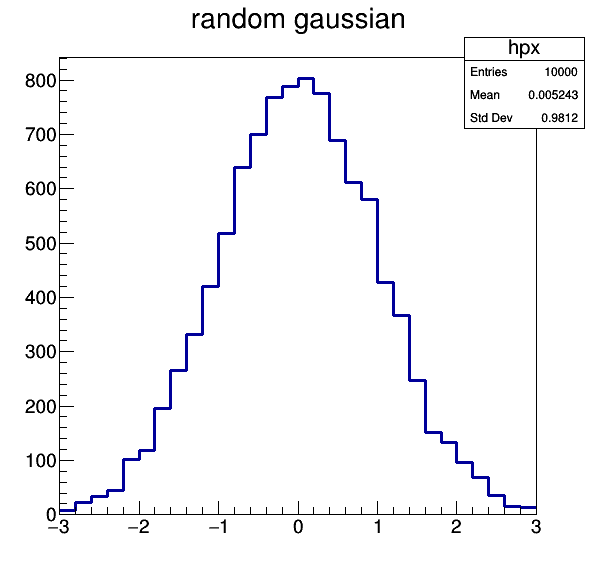

In [4]:
hpx.Draw();
c1.Draw();

How random is this? Do we get the same distribution if we run again?

In [5]:
TH1F hpx2("hpx2","random gaussian",30,-3,3);
for (Int_t i = 0; i < stats; i++) {
    double value = r.Gaus(0.0,1.0);
    hpx2.Fill(value);
}

And now draw again...  
**Note that you need to use the `SAME` option in order to have it in the same canvas.**

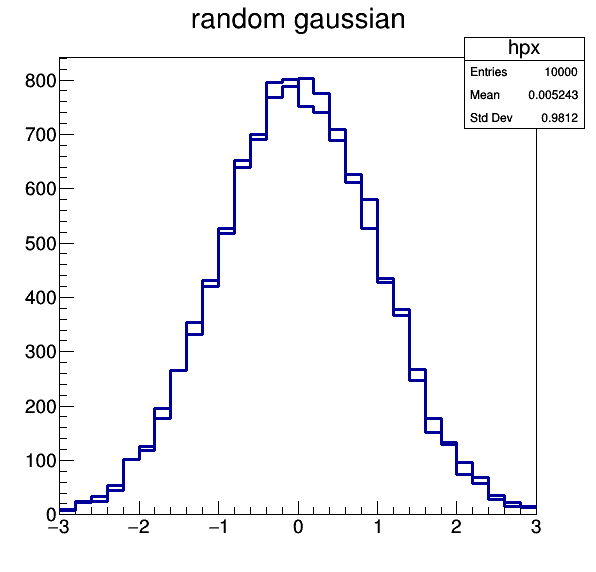

In [6]:
hpx2.Draw("SAME");
c1.Draw();

Apparently, it is random and the distributions look different, why is that?  
Any random number generator needs a seed, by default  
`r.SetSeed(0);`  
is used which means, the **system time of the computer** is used.  
If you want to get the exact same random distributions you need to set the same seed for both generations:

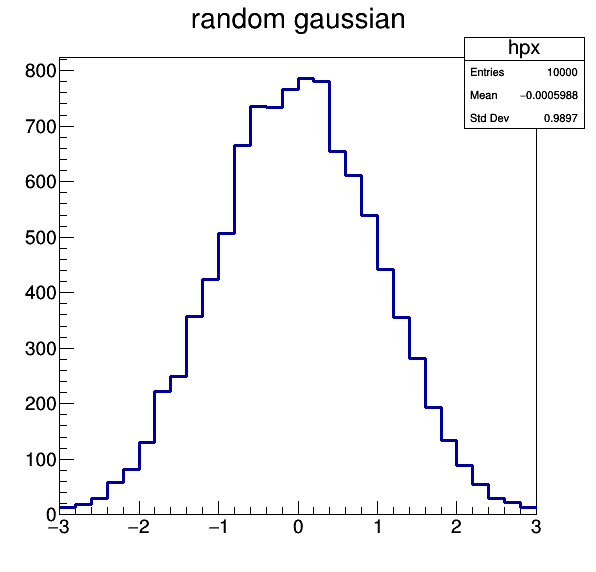

In [7]:
//Reset histograms
hpx.Reset();
hpx2.Reset();

//Set a seed=1234
r.SetSeed(1234);

//Loop
for (Int_t i = 0; i < stats; i++) {
    double value = r.Gaus(0.0,1.0);
    hpx.Fill(value);
}

//Set a seed=1234
r.SetSeed(1234);

//Loop
for (Int_t i = 0; i < stats; i++) {
    double value = r.Gaus(0.0,1.0);
    hpx2.Fill(value);
}

//Draw histogram
hpx.Draw("SAME");
hpx2.Draw("SAME");
c1.Draw();

Ok, now we don't see any difference in the distributions. It is often very useful to reproduce results!

## Two-dimensional histogram

Create a 2D histogram:

In [8]:
TH2F hpxpy("hpxpy","py vs px",30,-3,3,30,-3,3);

Use a 2-dimensional Gaussian with mean 0, width 1 (Rannor), fill the 2D histogram and draw:

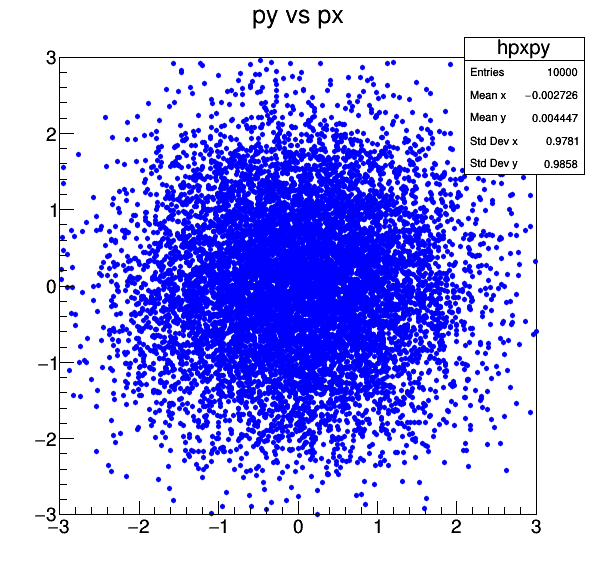

In [9]:
Float_t py;
for (Int_t i = 0; i < stats; i++) {
    r.Rannor(px,py);
    hpxpy.Fill(px,py);
}
hpxpy.Draw();
c1.Draw();

Now we just see the *hit* distribution but it is hard to tell how many events are in each bin. We can use the `COLZ` draw option instead:

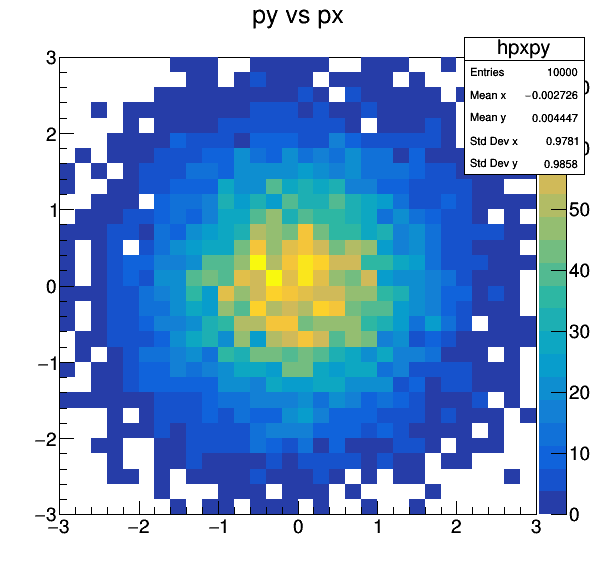

In [10]:
hpxpy.Draw("COLZ");
c1.Draw();

Now we can see from the colour code the number of entries.  
Or we can even draw it in a 3D-style:

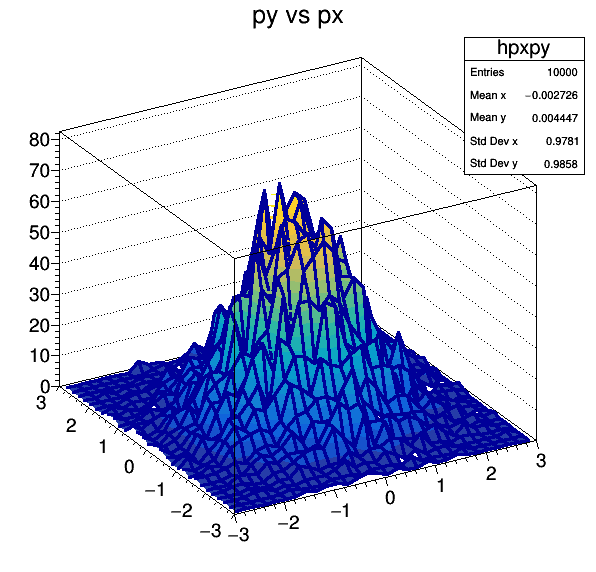

In [11]:
hpxpy.Draw("SURF1");
c1.Draw();

## Profiling a histogram

Two-dimensional histograms are sometimes difficult to read, so it often makes sense to look at the one-dimensional profile.

In [12]:
TProfile *hprof = new TProfile("hprof","Profile along px",30,-3,3,0,20);
hprof = hpxpy.ProfileX();

This is now a pointer to an object! We need to use `->` instead of `.`  

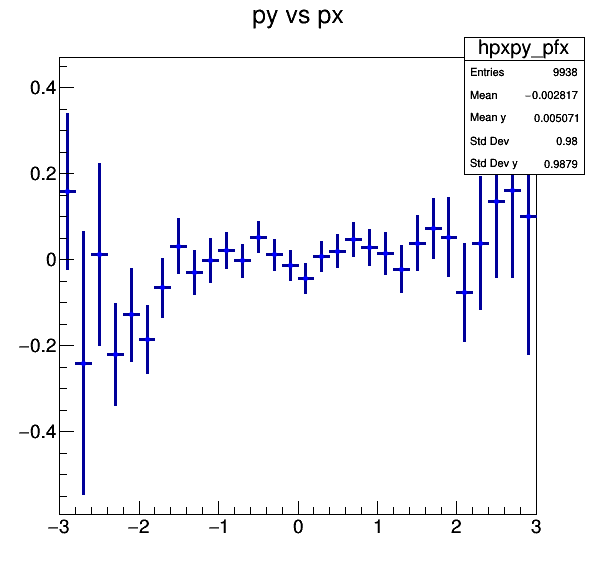

In [13]:
hprof->Draw();
c1.Draw();

Well, that makes sense, the mean should be zero!

## Graph with Errors

Assume that we measure a variable y vs x for a certain number of points n and we have an uncertainty on the measurement of y:

In [14]:
const int n=10;
double x[n]    = {1,2,3,4,5,6,7,8,9,10};
double y[n]    = {6,12,14,20,22,24,35,45,44,53};
double y_err[n]= {5,5,4.7,4.5,4.2,5.1,2.9,4.1,4.8,5.43};

We can then display our measurement using TGraphErrors, which allows for symmetric uncerstainties.  
By using the `APE` draw option the graph is shown with a new axis (A) markers (P) and errors (E).

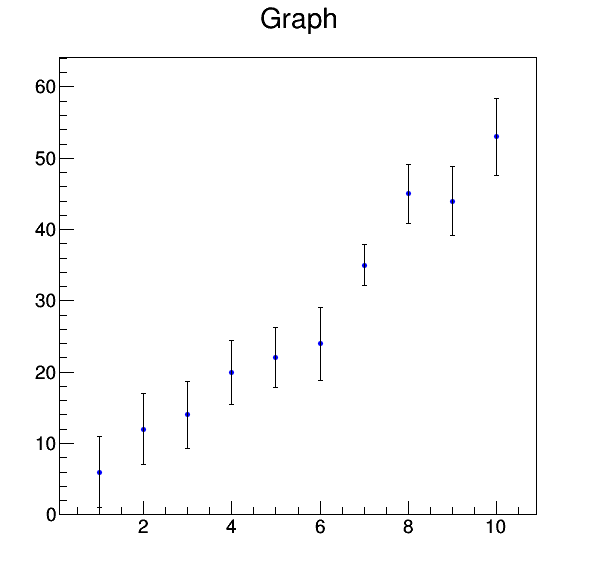

In [15]:
TGraphErrors graph(n, x, y, nullptr, y_err);
graph.Draw("APE");
c1.Draw();

## Fit with a one-dimensional function

Define a linear function using TF1 and fit the Graph

 FCN=3.84883 FROM MIGRAD    STATUS=CONVERGED      31 CALLS          32 TOTAL
                     EDM=5.96982e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.01604e+00   3.33409e+00   1.48321e-03  -8.98235e-12
   2  p1           5.18756e+00   5.30717e-01   2.36095e-04   9.40487e-12


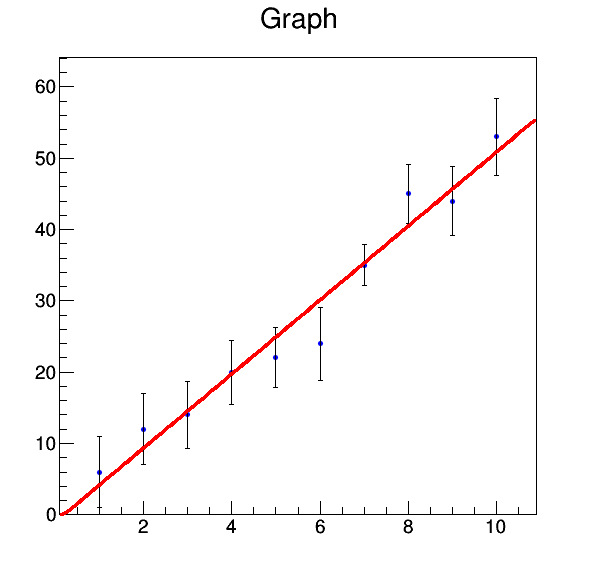

In [16]:
TF1 *f = new TF1("linear","[0]+x*[1]",.5,10.5);
graph.Fit(f);
f->Draw("SAME");
c1.Draw();

## Write a ROOT file

Open ROOT file with option `RECREATE`, save all objects we have created in it and close it:

In [17]:
TFile hfile("test.root","RECREATE","Test ROOT file");
hpx.Write();
hpx2.Write();
hpxpy.Write();
hprof->Write();
graph.Write();
hfile.Write();
hfile.Close();

Now we can have a look at the content:

In [18]:
.! rootls -l test.root

TGraphErrors  Jul 21 14:42  Graph      "Graph"
TH1F          Jul 21 14:42  hpx        "random gaussian"
TH1F          Jul 21 14:42  hpx2       "random gaussian"
TH2F          Jul 21 14:42  hpxpy      "py vs px"
TProfile      Jul 21 14:42  hpxpy_pfx  "py vs px"


## Open a root file and read in variables from a tree

Similarly, we can open an exisiting root file with option `READ`:

In [19]:
TFile *fSig = new TFile("Signal_1fb.root", "READ");

Information is often stored in so called `Trees` which can contain `Branches` and `Leaves` representing the content.  
We can retrieve a tree using its name "tree":

In [20]:
TTree *tSig = (TTree*)fSig->Get("tree");

To get the content of the tree we need to link a branch variable `invariantMass` to a local variable `mass`:

In [21]:
double mass;
tSig->SetBranchAddress("invariantMass", &mass);

We now create a new histogram in order to plot the content and get the number of entries of the tree. 

In [22]:
TH1F *hSig = new TH1F("signal", "", 50, 100, 160);
int nEntries_Sig = tSig -> GetEntries();

One entry of a tree can often be understood as one event with many different properties stored in the branches. To fill the histogram with all events, we need to loop over the tree:

In [23]:
for(int i = 0; i < nEntries_Sig; ++i){
    tSig->GetEntry(i);
    hSig->Fill(mass);
}

Finally, we can draw the histogram on the canvas:

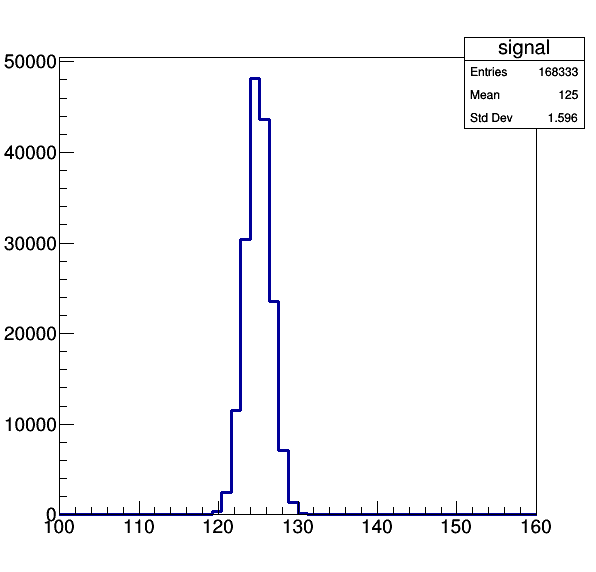

In [24]:
hSig->Draw();
c1.Draw();

## Stacked histograms

Last, but not least we want to create a stacked histgram, which are often used to show the different process contributions in simulations.

In [25]:
THStack hstack("stack","Stacked histograms");

We can now simply add the created signal histogram to the `THStack` object:

In [26]:
hstack.Add(hSig);

Ok, nice but to have a stacked histogram we need another histogram, let's read in the background and fill a histogram:

In [27]:
TFile *fBkg = new TFile("Background_1fb.root", "READ");
TTree *tBkg = (TTree*) fBkg -> Get("tree");
TH1F *hBkg = new TH1F("bkg","", 50, 100, 160);

double mass_bkg;
tBkg->SetBranchAddress("invariantMass", &mass_bkg);

int nEntries_Bkg = tBkg -> GetEntries();
for(int i = 0; i < nEntries_Bkg; ++i){
    tBkg->GetEntry(i);
    hBkg->Fill(mass_bkg);
}

Now we can also add it to the stack, fill the histograms with color and draw it:

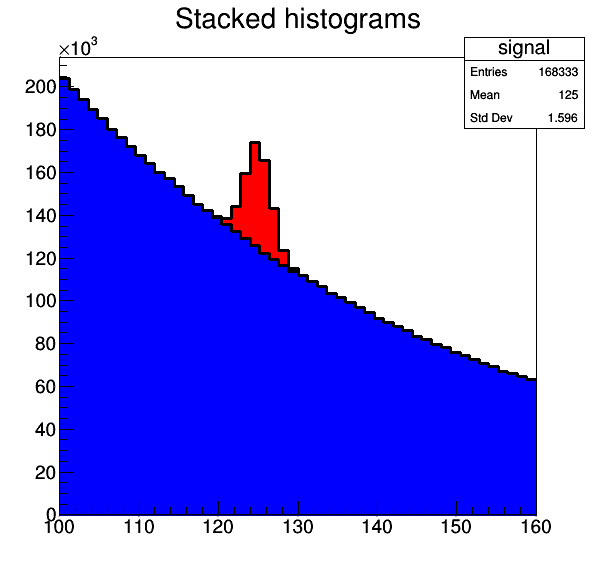

In [28]:
hstack.RecursiveRemove(hSig);
hstack.Add(hBkg);
hstack.Add(hSig);
hBkg->SetFillColor(kBlue);
hBkg->SetLineColor(kBlack);
hSig->SetFillColor(kRed);
hSig->SetLineColor(kBlack);
hstack.Draw();
c1.Draw();

### Disclaimer: This is of course not a complete list of important objects, but knowing all these will give you a good basis!